In [4]:
import cx_Oracle
import pandas as pd
import os
# port = os.environ['port']
# pw = os.environ['password']
# host = os.environ['host']
# service = os.environ['service']
# usr= os.environ['username']

port = os.environ['prod_port']
pw = os.environ['prod_pw']
host = os.environ['prod_host']
service = os.environ['prod_service']
usr= os.environ['prod_username']


# print(host)
# print(service)
path = '/home/jovyan/instantclient_21_6'


#print(cx_Oracle.clientversion())  
print(path)
#path = 'C:\ORACLE\instantclient_19_11'
#cx_Oracle.init_oracle_client(lib_dir= path)
try:
    cx_Oracle.init_oracle_client(lib_dir= path)
except Exception as err:
    print('client already initialised')
cx_Oracle.clientversion()  
dsn_tns = cx_Oracle.makedsn(host, port, service_name=service)

conn = cx_Oracle.connect(user=usr, password=pw, dsn=dsn_tns)

c = conn.cursor()

no_sus = """

select "WBC_CASE_D"."CASE_NUM" "Case_Number", "WBC_DATE_D_Start"."CALENDAR_DATE" "Start_Date", "WBC_DATE_D_Exit"."CALENDAR_DATE" "Exit_Date", avg("coguda30"."WEEKS_TO_ACHV_SUST_EMP_ELAPSED") "c4", "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME" "Stage_of_Employment_Service1"
 from "CDW"."WBC_CASE_D" "WBC_CASE_D", "CDW"."WBC_DATE_D" "WBC_DATE_D_Start", "CDW"."WBC_DATE_D" "WBC_DATE_D_Exit", "CDW"."WBC_CASE_F" "coguda30", "CDW"."WBC_OFFICE_D" "coguda31", "CDW"."WBC_ES_STAGE_OF_SERVICE_D" "WBC_ES_STAGE_OF_SERVICE_D"
 where  "coguda30"."OFFICE_ORG_WID"="coguda31"."OFFICE_ORG_WID" and "WBC_DATE_D_Start"."FISCAL_YEAR">2019 and "coguda30"."ES_SRV_PLN_TYPE" in ('Employment Services') and "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME" in ('Before Sustainable Employment Achieved', 'Left Before Outcome', 'Not Available') and "coguda30"."CASE_TYPE_WID"=1 and "coguda30"."SNAPSHOT_DT_WID"=(
select snapshot_dt_wid
 from cdw.wbc_run_ctl_d) and "coguda30"."CASE_WID"="WBC_CASE_D"."CASE_WID" and "coguda30"."ES_STAGE_OF_SERVICE_WID"="WBC_ES_STAGE_OF_SERVICE_D"."ES_STAGE_OF_SERVICE_WID" and "WBC_DATE_D_Start"."DATE_WID"="coguda30"."PLAN_START_DT_WID" and "coguda30"."PLAN_CLOSED_DT_WID"="WBC_DATE_D_Exit"."DATE_WID"
 group by "WBC_CASE_D"."CASE_NUM", "WBC_DATE_D_Exit"."CALENDAR_DATE", "WBC_DATE_D_Start"."CALENDAR_DATE", "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME"


"""

sus = """

select "WBC_CASE_D"."CASE_NUM" "Case_Number", "WBC_DATE_D_Start"."CALENDAR_DATE" "Start_Date", "WBC_DATE_D_Exit"."CALENDAR_DATE" "Exit_Date", avg("coguda30"."WEEKS_TO_ACHV_SUST_EMP_ELAPSED") "c4", "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME" "Stage_of_Employment_Service1"
 from "CDW"."WBC_CASE_D" "WBC_CASE_D", "CDW"."WBC_DATE_D" "WBC_DATE_D_Start", "CDW"."WBC_DATE_D" "WBC_DATE_D_Exit", "CDW"."WBC_CASE_F" "coguda30", "CDW"."WBC_OFFICE_D" "coguda31", "CDW"."WBC_ES_STAGE_OF_SERVICE_D" "WBC_ES_STAGE_OF_SERVICE_D"
 where "coguda30"."OFFICE_ORG_WID"="coguda31"."OFFICE_ORG_WID" and "WBC_DATE_D_Start"."FISCAL_YEAR">2019 and "coguda30"."ES_SRV_PLN_TYPE" in ('Employment Services') and "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME" in ('Left Before Completing Sustainment', 'Left After Completing Sustainment', 'In Sustainment') and "coguda30"."CASE_TYPE_WID"=1 and "coguda30"."SNAPSHOT_DT_WID"=(
select snapshot_dt_wid
 from cdw.wbc_run_ctl_d) and "coguda30"."CASE_WID"="WBC_CASE_D"."CASE_WID" and "coguda30"."ES_STAGE_OF_SERVICE_WID"="WBC_ES_STAGE_OF_SERVICE_D"."ES_STAGE_OF_SERVICE_WID" and "WBC_DATE_D_Start"."DATE_WID"="coguda30"."PLAN_START_DT_WID" and "coguda30"."PLAN_CLOSED_DT_WID"="WBC_DATE_D_Exit"."DATE_WID"
 group by "WBC_CASE_D"."CASE_NUM", "WBC_DATE_D_Exit"."CALENDAR_DATE", "WBC_DATE_D_Start"."CALENDAR_DATE", "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME"




"""
df = pd.read_sql(sus, con=conn)
print(df.shape)
df2 = pd.read_sql(no_sus, con=conn)
print(df2.shape)

link = """
select distinct "WBC_CASE_D"."CASE_NUM" "Case_Number", "WBC_CATCHMENT_AREA_D"."REGION_CODE" "Region_Code", "WBC_CATCHMENT_AREA_D"."CATCHMENT" "Catchment", "WBC_OES_APPLICATION_D"."EXPLAINING_TO_OTHERS" "Explaining_to_Others", "WBC_OES_APPLICATION_D"."GET_ALONG_WITH_OTHERS" "Getting_Along_with_Others", "WBC_OES_APPLICATION_D"."LEARNING_NEW_THINGS" "New_Things", "WBC_OES_APPLICATION_D"."ORGANIZING_INFORMATION" "Organizing", "WBC_OES_APPLICATION_D"."PROBLEM_SOLVING" "Problem_Solving", "WBC_OES_APPLICATION_D"."READING_INFORMATION" "Reading_and_Understanding", "WBC_OES_APPLICATION_D"."USING_COMPUTERS" "Using_Computers", "WBC_OES_APPLICATION_D"."CREATING_DOCUMENTS" "Working_with_Documents", "WBC_OES_APPLICATION_D"."WORKING_WITH_MATH" "Working_with_Math", "WBC_OES_APPLICATION_D"."WRITING_INFORMATION" "Writing", "WBC_OES_APPLICATION_D"."FRANCOPHONE" "Francophone", "WBC_OES_APPLICATION_D"."RECENT_IMMIGRANT" "Recent_Immigrant", "WBC_OES_APPLICATION_D"."INDIGENOUS_PERSON" "Indigenous_Person", "WBC_OES_APPLICATION_D"."PERSON_WITH_DISABILITY" "Person_with_a_Disability", "WBC_OES_APPLICATION_D"."SURVIVOR_OF_VIOLENCE" "Survivor_of_Violence_or_Abuse", "WBC_OES_APPLICATION_D"."LANGUAGE" "Language19", "WBC_OES_APPLICATION_D"."LANGUAGE_OTHER" "Other_Language", "WBC_OES_APPLICATION_D"."DISABILITY_OTHER_DESC" "Other_Disability_Discription", "WBC_OES_APPLICATION_D"."STATUS_IN_CANADA_OTHER_DESC" "c22", "WBC_OES_APPLICATION_D"."SCHOOL_LEVEL" "Education_Level", "WBC_OES_APPLICATION_D"."CURRENTLY_IN_SCHOOL" "Currently_In_School", "WBC_OES_APPLICATION_D"."CURRENTLY_IN_SCHOOL_STATUS" "c25", "WBC_OES_APPLICATION_D"."AREA_OF_STUDY" "Education_Area_of_Study", "WBC_OES_APPLICATION_D"."INDIGENOUS_TYPE" "Indigenous_Type", "WBC_OES_APPLICATION_D"."STATUS_INDIAN" "Status_Indian", "WBC_OES_APPLICATION_D"."DRENA_REQUIRED" "DRENA_Required", "WBC_OES_APPLICATION_D"."LEGAL_TO_WORK" "c30", "WBC_OES_APPLICATION_D"."CHANGE_OF_CIRCUMSATNCE" "Change_of_Circumstance", "WBC_OES_APPLICATION_D"."CHANGE_OF_CIRCUMSATNCE_REASON" "Change_of_Circumstance_Reason", "WBC_OES_APPLICATION_D"."BCEID_GUID" "BCeID_GUID", "WBC_OES_APPLICATION_D"."CLIENT_BCEID" "Client_BCeID", "WBC_OES_APPLICATION_D"."CLIENT_CONSENT" "Client_Consent", "WBC_OES_APPLICATION_D"."PROGRAM_TYPE" "Program_Type", "WBC_OES_APPLICATION_D"."CURRENT_EMPLOYMENT_INSURANCE" "c37", "WBC_OES_APPLICATION_D"."PAST_EMPLOYMENT_INSURANCE" "c38", "WBC_OES_APPLICATION_D"."PAST_FIVE_YEARS_WORK" "c39", "WBC_OES_APPLICATION_D"."BCEA_INCOME_ASSISTANCE" "c40", "WBC_OES_APPLICATION_D"."INCOME_ASSISTANCE_DURATION" "c41", "WBC_OES_APPLICATION_D"."NON_BC_INCOME_ASSISTANCE" "c42", "WBC_OES_APPLICATION_D"."NON_BC_INCOME_ASSISTANCE_CNT" "c43", "WBC_OES_APPLICATION_D"."OTHER_FUNDING" "c44", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_AGE" "Age", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_LACK_HOUSING" "Lack_Housing", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_ADDICTION" "Addiction", "WBC_OES_APPLICATION_D"."VISIBLE_MINORITY" "Visible_Minority", "WBC_OES_APPLICATION_D"."CHILDREN_AT_HOME" "Child_at_Home", "WBC_OES_APPLICATION_D"."SINGLE_PARENT" "Single_Parent", "WBC_OES_APPLICATION_D"."DISABILITY_PHYSICAL" "Physical_Disability", "WBC_OES_APPLICATION_D"."DISABILITY_LEARNING" "Learning_Disablilit", "WBC_OES_APPLICATION_D"."DEVELOPMENTAL_DISABILITY" "Developmental_Disability", "WBC_OES_APPLICATION_D"."DISABILITY_VISUAL" "Visual_Disability", "WBC_OES_APPLICATION_D"."DISABILITY_HEARING" "Hearing_Disability", "WBC_OES_APPLICATION_D"."DISABILITY_MENTAL_HEALTH" "Mental_Health_Condition", "WBC_OES_APPLICATION_D"."DISABILITY_CHRONIC_ILLNESS" "Chronic_Illness", "WBC_OES_APPLICATION_D"."DISABILITY_SHORT_TERM_ILLNESS" "Short_term_Illness", "WBC_OES_APPLICATION_D"."DISABILITY_OTHER" "Other_Disability", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_IN_PERSON" "Interview_In_Person", "WBC_OES_APPLICATION_D"."EMPLOYED" "Client_Employed_Flag", "WBC_OES_APPLICATION_D"."UNEMP_PERSONAL_SITUATION" "c62", "WBC_OES_APPLICATION_D"."UNEMP_KEEPING_JOBS" "Unemployed___Keeping_Jobs", "WBC_OES_APPLICATION_D"."UNEMP_DISABLTY_SUPPORTS_NEEDED" "c64", "WBC_OES_APPLICATION_D"."UNEMP_KIND_OF_WORK_UNKNOWN" "c65", "WBC_OES_APPLICATION_D"."UNEMP_FNCL_SUPPORTS_NEEDED" "c66", "WBC_OES_APPLICATION_D"."UNEMP_TRAINING_NEEDED" "Unemployed___Training_Needed", "WBC_OES_APPLICATION_D"."UNEMP_JOB_SEARCH_HELP_NEEDED" "c68", "WBC_OES_APPLICATION_D"."UNEMP_JOB_OFFER_LACK_RESOURCES" "Unemployed___Lack_Resources", "WBC_OES_APPLICATION_D"."UNEMP_RETURN_TO_SAME_WORK" "c70", "WBC_OES_APPLICATION_D"."UNEMP_OTHER_FACTOR" "Unemployed___Other", "WBC_OES_APPLICATION_D"."UNEMP_OTHER_FACTOR_DESC" "Unemployed___Other_Description", "WBC_OES_APPLICATION_D"."EMP_SELF_EMPLOYED" "Employed___Self_Employed", "WBC_OES_APPLICATION_D"."EMP_LOSING_JOB" "Employed___Losing_Job", "WBC_OES_APPLICATION_D"."EMP_DISABLTY_SUPPORTS_NEEDED" "Employed___Disability_Supports", "WBC_OES_APPLICATION_D"."EMP_JOB_OFFER_LACK_RESOURCES" "Employed___Lack_Resources", "WBC_OES_APPLICATION_D"."EMP_NEED_MORE_HOURS_OF_WORK" "Employed___Need_More_hours", "WBC_OES_APPLICATION_D"."EMP_TRAINING_NEEDED" "Employed___Training", "WBC_OES_APPLICATION_D"."EMP_NEW_LINE_OF_WORK" "Employed___New_Line_of_Work", "WBC_OES_APPLICATION_D"."EMP_SEEKEING_CHANGE" "Employed___Dislike_Current", "WBC_OES_APPLICATION_D"."EMP_CHALLENGING_JOB" "Employed___More_Challenge", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_OTHER" "Employed___Other", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_OTHER_DESC" "Employed___Other_Description", "WBC_OES_APPLICATION_D"."EMPLOYMENT_SITUATION_LIST" "Employment_Situation_List", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_PHONE" "Interview_By_Telephone", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_VIDEO_CALL" "Interview_By_Video_Call", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_WITH_ATTNDENT" "Interview_With_Attendant", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_OTHER" "Interview_Other", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL" "Employment_Goal", "WBC_OES_APPLICATION_D"."HOURS_PER_WEEK" "Hours_per_Week_Goal", "WBC_OES_APPLICATION_D"."WAGE_PER_HOUR" "Wage_Per_Hour_Goal", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL_SEASONAL" "Goal_is_Seasonal", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL_CASUAL" "Goal_is_Casual", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL_RELOCATE" "Can_Relocate", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL_TRANSPORT" "Has_Transportation", "WBC_OES_APPLICATION_D"."PORTAL_APPLICATION_NUMBER" "OES_Application_Num", "WBC_OES_APPLICATION_D"."OFFICE" "Office", "WBC_OES_APPLICATION_D"."CATCHMENT" "Catchment_Selected", "WBC_OES_APPLICATION_D"."SERVICE_SELECTED" "Service_Selected", "WBC_OES_APPLICATION_D"."ACCEPTED_INTO_CASE_MGMT" "Accepted_into_Case_Management", "WBC_OES_APPLICATION_D"."NOTACCEPT_CASE_MGMT_OTHER_DESC" "c101", "WBC_OES_APPLICATION_D"."EXPLORE_WITH_CLIENT" "Explore_with_Client"
 from ((("CDW"."WBC_OFFICE_D" "WBC_OFFICE_D" INNER JOIN (
select "WBC_CATCHMENT_AREA_D"."CATCHMENT_AREA_WID" "CATCHMENT_AREA_WID", "WBC_CATCHMENT_AREA_D"."CATCHMENT" "CATCHMENT", "WBC_CATCHMENT_AREA_D"."REGION_CODE" "REGION_CODE"
 from "CDW"."WBC_CATCHMENT_AREA_D" "WBC_CATCHMENT_AREA_D"
 ) "WBC_CATCHMENT_AREA_D" on "WBC_OFFICE_D"."CATCHMENT_AREA_WID"="WBC_CATCHMENT_AREA_D"."CATCHMENT_AREA_WID") INNER JOIN (
select "WBC_OES_APPLICATION_F"."TAAAPA_WID" "TAAAPA_WID", "WBC_OES_APPLICATION_F"."OFFICE_ORG_WID" "OFFICE_ORG_WID", "WBC_OES_APPLICATION_F"."CASE_WID" "CASE_WID"
 from "CDW"."WBC_OES_APPLICATION_F" "WBC_OES_APPLICATION_F"
) "WBC_OES_APPLICATION_F" on "WBC_OES_APPLICATION_F"."OFFICE_ORG_WID"="WBC_OFFICE_D"."OFFICE_ORG_WID") INNER JOIN "CDW"."WBC_CASE_D" "WBC_CASE_D" on "WBC_OES_APPLICATION_F"."CASE_WID"="WBC_CASE_D"."CASE_WID") LEFT OUTER JOIN "CDW"."WBC_OES_APPLICATION_D" "WBC_OES_APPLICATION_D" on "WBC_OES_APPLICATION_F"."TAAAPA_WID"="WBC_OES_APPLICATION_D"."TAAAPA_WID"



"""
link = pd.read_sql(link, con=conn)
#print(link.head)
link2 = link[link['Case_Number'].isin(df['Case_Number'])]
print(link2.shape)
data = link2
l = []
for col in data.columns:
    #print("--------COLUMN--------")
    if data[col].nunique() > 100:
        print(col)
        
        if (col != 'Case_Number') & (col != 'Wage_Per_Hour_Goal'):
            l.append(col)

    #print(data[col].nunique())
data = data.drop(l, axis = 1)

pp = df[['Case_Number', 'c4']]

tt=data.merge(df[['Case_Number', 'c4']], on = 'Case_Number', how = 'left')

print(tt.columns)

/home/jovyan/instantclient_21_6
client already initialised


DatabaseError: ORA-12170: TNS:Connect timeout occurred

In [2]:
print(os.environ)

environ({'SHELL': '/bin/bash', 'WORKBC_WAGE_SUBSIDY_API_PORT_8000_TCP_PORT': '8000', 'KUBERNETES_SERVICE_PORT_HTTPS': '443', 'SCIPY_NOTEBOOK_PORT': 'tcp://10.98.210.4:8888', 'WORKBC_WAGE_SUBSIDY_API_SERVICE_PORT_API': '8000', 'ELMSD_WORKBC_COMMS_MONGODB_PORT_27017_TCP_PROTO': 'tcp', 'ELMSD_DEV_PATRONI_MASTER_SERVICE_PORT': '5432', 'SDD_CPAP_MAP_PORT_8443_TCP_PORT': '8443', 'WORKBC_SMALL_GRANTS_MONGODB_PORT_27017_TCP': 'tcp://10.98.236.63:27017', 'KUBERNETES_SERVICE_PORT': '443', 'ACCESS_TO_TECHNOLOGY_CRON_PORT': 'tcp://10.98.92.57:8000', 'db_name': 'postgres', 'SDD_CPAP_MAP_PORT_8443_TCP': 'tcp://10.98.173.253:8443', 'EOD_RESUME_BUNDLER_STATIC_PORT_8080_TCP_PORT': '8080', 'ACCESS_TO_TECHNOLOGY_STATIC_PORT_8080_TCP_PROTO': 'tcp', 'SDD_CPAP_MAP_SERVICE_PORT_8080_TCP': '8080', 'ACCESS_TO_TECHNOLOGY_API_PORT': 'tcp://10.98.141.32:8000', 'SDD_CPAP_MAP_PORT_8080_TCP_ADDR': '10.98.173.253', 'WORKBC_WAGE_SUBSIDY_CRON_PORT_8000_TCP': 'tcp://10.98.173.108:8000', 'HOSTNAME': 'analytics-notebook-2

In [4]:
from sklearn import preprocessing
tt=tt.drop('Case_Number', axis = 1)
tt=tt.drop(['Wage_Per_Hour_Goal', 'c101', 'c22'], axis = 1)
tst = tt
print(tt.columns)
#print(tst.dtypes)
#le = preprocessing.LabelEncoder()
le = preprocessing.OneHotEncoder()

# for col in tst.columns:
#     if col != 'c4':
#         tst[col] = le.fit_transform(tst[col].astype(str))

# print(tst.head)
features = tst.drop('c4', axis = 1)
label = tst['c4']
for col in features.columns:
    features[col]=features[col].astype(str)

le.fit(features)
features = pd.DataFrame(le.transform(features).toarray())
print(features.shape)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)





Index(['Region_Code', 'Catchment', 'Explaining_to_Others',
       'Getting_Along_with_Others', 'New_Things', 'Organizing',
       'Problem_Solving', 'Reading_and_Understanding', 'Using_Computers',
       'Working_with_Documents', 'Working_with_Math', 'Writing', 'Francophone',
       'Recent_Immigrant', 'Indigenous_Person', 'Person_with_a_Disability',
       'Survivor_of_Violence_or_Abuse', 'Language19', 'Education_Level',
       'Currently_In_School', 'c25', 'Indigenous_Type', 'Status_Indian',
       'DRENA_Required', 'c30', 'Change_of_Circumstance', 'Client_Consent',
       'Program_Type', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44',
       'Age', 'Lack_Housing', 'Addiction', 'Visible_Minority', 'Child_at_Home',
       'Single_Parent', 'Physical_Disability', 'Learning_Disablilit',
       'Developmental_Disability', 'Visual_Disability', 'Hearing_Disability',
       'Mental_Health_Condition', 'Chronic_Illness', 'Short_term_Illness',
       'Other_Disability', 'Interview_In_Pe

In [5]:
print(x_train.shape)
print(features.shape)
print(tt.shape)

(23776, 493)
(31702, 493)
(31702, 88)


[[226  47  36 ...   0   0   0]
 [ 72  44  28 ...   0   0   0]
 [ 53  52  43 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
The mean squared error (MSE) on test set: 1018.8592


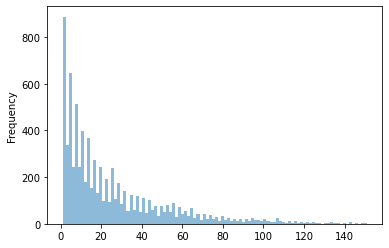

In [5]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(x_train,y_train)
y_test.plot.hist(bins=100, alpha=0.5)

y_pred = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
print(confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))


In [7]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.90)
pca.fit(x_train)
print(pca.n_components_)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train_pca, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test_pca))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

y_pred = reg.predict(x_test_pca)

mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

156


/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


The mean squared error (MSE) on test set: 668.6912
The mean squared error (MSE) on test set: 25.8591


In [10]:
print('hello')
import pickle as pk
pk.dump(pca, open("/home/jovyan/work/pca_weeks_to_sus.pkl","wb"))

hello


In [9]:
import pickle as pk
filename = '/home/jovyan/work/finalized_weeks_to_sus_model.sav'
pk.dump(reg, open(filename, 'wb'))


In [ ]:

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

y_pred = reg.predict(x_test)

mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(10, 10), random_state=1, max_iter = 2000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred.round()))
print(confusion_matrix(y_test, y_pred.round()))
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.90)
pca.fit(x_train)
print(pca.n_components_)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train_pca, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test_pca))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

y_pred = reg.predict(x_test_pca)

mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
